In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from collections import OrderedDict
from common.optimizer import *
from common.functions import sigmoid, tanh, relu
from deep_convnet import DeepConvNet
from common.util import shuffle_dataset, smooth_curve
from common.layers import *
from common.gradient import numerical_gradient
from common.trainer import Trainer
import pickle
from os import listdir

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = DeepConvNet()
network.load_params("deep_convnet_params.pkl")

calculating test accuracy ... 
test accuracy:0.9935
======= misclassified result =======
{view index: (label, inference), ...}
{1: (6, 0), 2: (3, 5), 3: (3, 5), 4: (8, 3), 5: (7, 3), 6: (1, 3), 7: (8, 9), 8: (6, 0), 9: (6, 5), 10: (7, 2), 11: (9, 4), 12: (7, 1), 13: (5, 3), 14: (1, 3), 15: (0, 6), 16: (9, 4), 17: (7, 9), 18: (6, 0), 19: (9, 8), 20: (4, 9)}


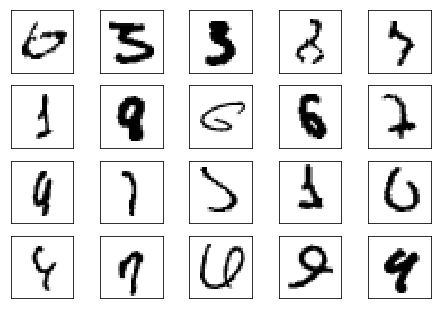

In [3]:

print("calculating test accuracy ... ")
#sampled = 1000
#x_test = x_test[:sampled]
#t_test = t_test[:sampled]

classified_ids = []

acc = 0.0
batch_size = 100

for i in range(int(x_test.shape[0] / batch_size)):
    tx = x_test[i*batch_size:(i+1)*batch_size]
    tt = t_test[i*batch_size:(i+1)*batch_size]
    y = network.predict(tx, train_flg=False)
    y = np.argmax(y, axis=1)
    classified_ids.append(y)
    acc += np.sum(y == tt)
    
acc = acc / x_test.shape[0]
print("test accuracy:" + str(acc))

classified_ids = np.array(classified_ids)
classified_ids = classified_ids.flatten()
 
max_view = 20
current_view = 1

fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)

mis_pairs = {}
for i, val in enumerate(classified_ids == t_test):
    if not val:
        ax = fig.add_subplot(4, 5, current_view, xticks=[], yticks=[])
        ax.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        mis_pairs[current_view] = (t_test[i], classified_ids[i])
            
        current_view += 1
        if current_view > max_view:
            break

print("======= misclassified result =======")
print("{view index: (label, inference), ...}")
print(mis_pairs)

plt.show()


In [4]:
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    img =  np.zeros((1,1,28,28))
    for i in range(24):
        for j in range(24):
            img[0,0,i+1,j+1] = returnVect[0,int(i*32/24)* 32 + int(j*32/24) ]
    return img

In [5]:
trainingFileList = listdir('../MLIA-note/ch02/trainingDigits')           #load the training set
m = len(trainingFileList)
hwLabels = []
trainingMat = np.zeros((m,1,28,28))
for i in range(m):
    fileNameStr = trainingFileList[i]
    fileStr = fileNameStr.split('.')[0]     #take off .txt
    classNumStr = int(fileStr.split('_')[0])
    hwLabels.append(classNumStr)
    trainingMat[i,:] = img2vector('../MLIA-note/ch02/trainingDigits/%s' % fileNameStr)

In [6]:
batch_size = 100
accuracy_cnt = 0
for i in range(0, len(trainingMat), batch_size):
    x_batch = trainingMat[i:i+batch_size]
    y_batch = network.predict(x_batch)
    p = np.argmax(y_batch, axis=1)
    t = hwLabels[i:i+batch_size]
    #print(p,t)
    #t = t.argmax(axis=1)
    accuracy_cnt += np.sum(p == t)
    #print(accuracy_cnt,p,t)

print("Accuracy: %.2f%%" %(float(accuracy_cnt) / len(trainingMat) * 100))

Accuracy: 82.68%


calculating test accuracy ... 
test accuracy:0.8263157894736842
(1900,) (1900,)
======= misclassified result =======
{view index: (label, inference), ...}
{1: (9, 3), 2: (7, 3), 3: (4, 6), 4: (7, 2), 5: (4, 6), 6: (1, 6), 7: (1, 8), 8: (9, 1), 9: (5, 8), 10: (3, 5), 11: (4, 9), 12: (1, 6), 13: (1, 8), 14: (7, 2), 15: (4, 9), 16: (1, 4), 17: (1, 2), 18: (1, 4), 19: (4, 9), 20: (1, 8)}


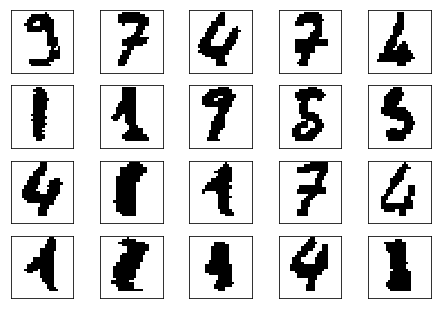

In [7]:
print("calculating test accuracy ... ")
#sampled = 1000
#x_test = x_test[:sampled]
#t_test = t_test[:sampled]

classified_ids = []
x_test = trainingMat[:1900]
t_test = np.array(hwLabels[:1900])

acc = 0.0
batch_size = 100

for i in range(int(x_test.shape[0] / batch_size)):
    tx = x_test[i*batch_size:(i+1)*batch_size]
    tt = t_test[i*batch_size:(i+1)*batch_size]
    y = network.predict(tx, train_flg=False)
    y = np.argmax(y, axis=1)
    classified_ids.append(y)
    acc += np.sum(y == tt)
    
acc = acc / x_test.shape[0]
print("test accuracy:" + str(acc))

classified_ids = np.array(classified_ids)
classified_ids = classified_ids.flatten()
t_test = t_test.flatten()

max_view = 20
current_view = 1

fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)

print(classified_ids.shape, t_test.shape )

mis_pairs = {}
for i, val in enumerate(classified_ids == t_test):
    if not val:
        ax = fig.add_subplot(4, 5, current_view, xticks=[], yticks=[])
        ax.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        mis_pairs[current_view] = (t_test[i], classified_ids[i])
            
        current_view += 1
        if current_view > max_view:
            break

print("======= misclassified result =======")
print("{view index: (label, inference), ...}")
print(mis_pairs)

plt.show()

In [8]:
sampled = 10000 # 为了实现高速化
x_test = x_test[:sampled]
t_test = t_test[:sampled]

print("caluculate accuracy (float64) ... ")
print(network.accuracy(x_test, t_test))

# 转换为float16型
x_test = x_test.astype(np.float16)
for param in network.params.values():
    param[...] = param.astype(np.float16)

print("caluculate accuracy (float16) ... ")
print(network.accuracy(x_test, t_test))


caluculate accuracy (float64) ... 
0.8263157894736842
caluculate accuracy (float16) ... 
0.8263157894736842
